In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install quandl
import quandl

In [3]:
data = quandl.get("NSE/TATAGLOBAL")

In [4]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


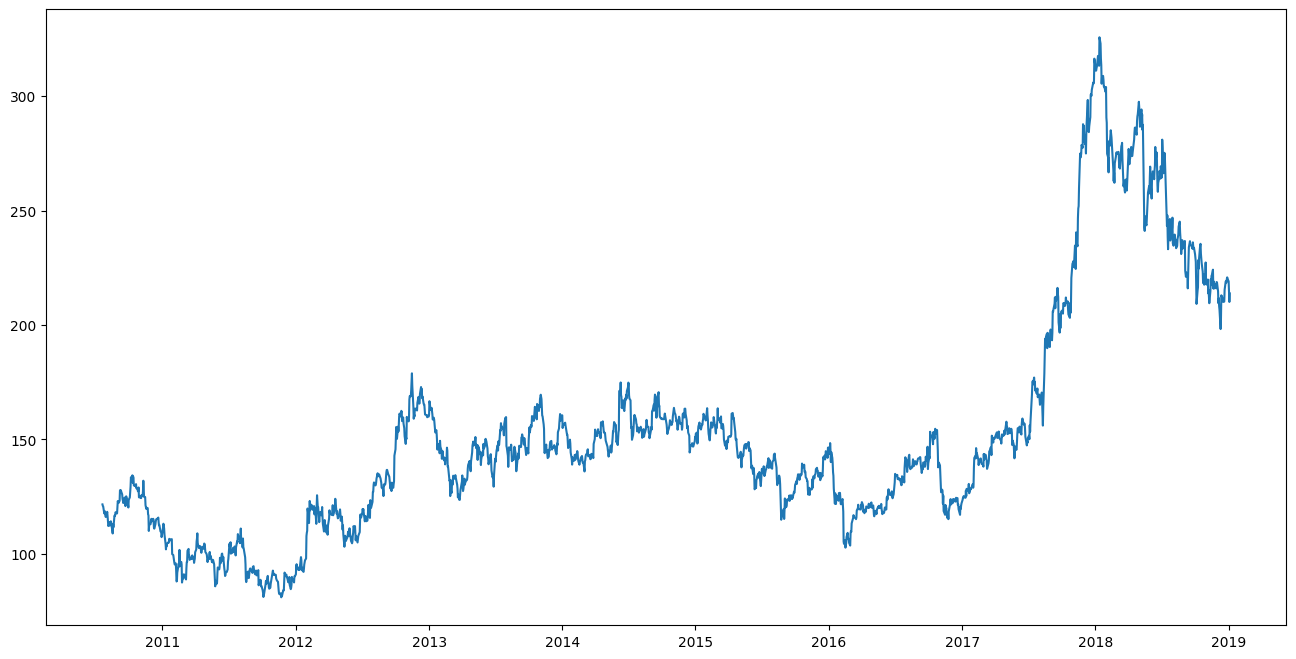

In [5]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Closing Price')

Classification Problem : Buy(+1) or sell(-1) the stock

In [6]:
# @title Default title text
data['Open - Close']= data['Open'] - data['Close']
data['High - Low']= data['High'] - data['Low']
data = data.dropna()

Input Features to predict whether customer should buy or sell the stock

In [7]:
x = data[['Open - Close', 'High - Low']]
x.head()

,Open - Close,High - Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


from matplotlib import pyplot as plt
_df_0['Open - Close'].plot(kind='hist', bins=20, title='Open - Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High - Low'].plot(kind='hist', bins=20, title='High - Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Open - Close', y='High - Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Open - Close'].plot(kind='line', figsize=(8, 4), title='Open - Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['High - Low'].plot(kind='line', figsize=(8, 4), title='High - Low')
plt.gca().spines[['top', 'right']].set_visible(False)

Intention is to store +1 for the buy signal and -1 fro the sell signal. The target is 'Y' for classification task.

In [24]:
Y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [25]:
Y

array([-1, -1, -1, ..., -1,  1, -1])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,Y,test_size=0.25, random_state = 44)

Implementation of KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using gridseaarch to find the parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

#fit the model
model.fit(x_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.68
Test_data Accuracy: 0.51


In [31]:
prediction_classification = model.predict(x_test)

In [34]:
actual_predicted_data = pd.DataFrame({'Actual Class':y_test, 'Predicted Class':prediction_classification})

In [35]:
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,-1,1
1,1,1
2,1,-1
3,1,1
4,-1,-1
5,-1,-1
6,-1,1
7,-1,-1
8,-1,1
9,1,-1


from matplotlib import pyplot as plt
_df_5['Actual Class'].plot(kind='hist', bins=20, title='Actual Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Predicted Class'].plot(kind='hist', bins=20, title='Predicted Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Actual Class', y='Predicted Class', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Actual Class'].plot(kind='line', figsize=(8, 4), title='Actual Class')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Predicted Class'].plot(kind='line', figsize=(8, 4), title='Predicted Class')
plt.gca().spines[['top', 'right']].set_visible(False)

Regression Problem: KNN

In [29]:
y = data['Close']

In [30]:
y

Date
2010-07-21    121.55
2010-07-22    120.90
2010-07-23    120.65
2010-07-26    117.60
2010-07-27    118.65
               ...  
2018-12-31    219.40
2019-01-01    219.10
2019-01-02    214.60
2019-01-03    210.05
2019-01-04    213.80
Name: Close, Length: 2100, dtype: float64

Implementation of KNN Regression

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.25, random_state=44)

#using gridseaarch to find the parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

#fit the model
model_reg.fit(x_train_reg, y_train_reg)
predictions = model_reg.predict(x_train_reg)

In [50]:
print(predictions)

[array([215.04666667, 130.84666667, 122.84333333]), array([116.50333333, 124.22      , 134.73666667]), array([155.34666667, 134.18      , 158.37333333]), array([142.09666667, 146.20333333, 141.05      ]), array([207.22333333, 147.13      , 172.31      ]), array([115.91333333, 142.52      , 132.32666667]), array([145.51333333, 140.77666667, 139.41      ]), array([145.54333333, 167.15666667, 132.89      ]), array([126.64333333, 128.19666667, 129.69333333]), array([149.60666667, 144.16666667, 134.48333333]), array([143.08333333, 122.67333333, 133.44333333]), array([172.21333333, 162.36      , 211.39333333]), array([166.16333333, 141.26666667, 123.2       ]), array([121.80333333, 206.22666667, 159.08      ]), array([113.17      , 133.77333333, 141.43333333]), array([202.44666667, 141.59666667, 166.74      ]), array([182.68333333, 131.92      , 123.65333333]), array([163.87666667, 169.07666667, 196.66333333]), array([170.62333333, 131.01333333, 130.08333333]), array([132.19      , 176.39333

In [51]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

154.37018920653486

In [52]:
valid = pd.DataFrame({'Actual Close':y_test_reg, 'Predicted CLose Value':predictions})

In [53]:
valid.head(10)

,Actual Close,Predicted CLose Value
Date,,
2015-03-17,156.70,"[215.04666666666665, 130.84666666666666, 122.8..."
2015-09-07,120.45,"[116.50333333333334, 124.22, 134.73666666666665]"
2013-02-18,141.90,"[155.3466666666667, 134.17999999999998, 158.37..."
2013-07-05,145.15,"[142.09666666666666, 146.2033333333333, 141.05]"
2018-03-15,279.60,"[207.2233333333333, 147.13000000000002, 172.31..."
2017-01-19,130.50,"[115.91333333333334, 142.52, 132.32666666666665]"
2013-11-26,145.50,"[145.51333333333332, 140.77666666666667, 139.41]"
2012-12-17,165.65,"[145.54333333333335, 167.15666666666667, 132.8..."
2016-07-11,133.10,"[126.64333333333333, 128.1966666666667, 129.69..."


from matplotlib import pyplot as plt
_df_10['Actual Close'].plot(kind='hist', bins=20, title='Actual Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Actual Close'].plot(kind='line', figsize=(8, 4), title='Actual Close')
plt.gca().spines[['top', 'right']].set_visible(False)